In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [4]:
dataset = pd.read_csv('shopping_trends.csv')

### Basic Operations on DataSet

In [5]:
dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Columns in Dataset

In [234]:
dataset.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [235]:
dataset.shape

(3900, 19)

In [236]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [237]:
dataset.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [238]:
#finding Null values in the data
dataset.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### Initial Analysis on Data :
#### 1) Data looks to be clean, Don't see any cleaning required or data type conversions

# Exploratory Data Analysis

## Age Distribution Plots

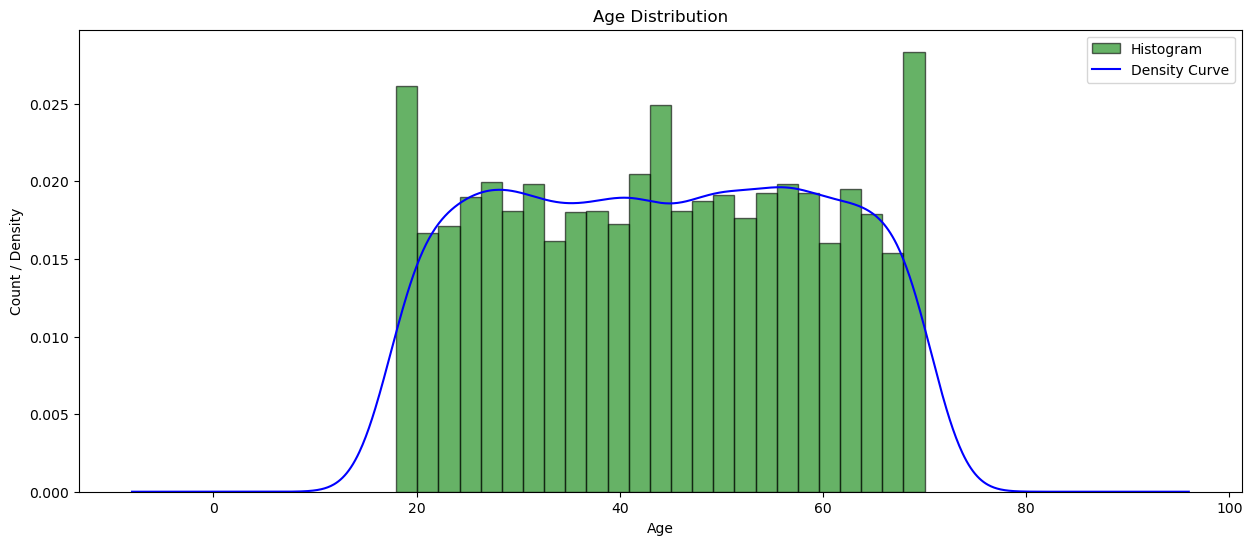

In [239]:
# Age Distribution
fig, ax = plt.subplots(figsize = (15,6))
ax.hist(dataset.Age,color='green',edgecolor = 'black',bins=25,alpha = 0.6,density = True,label="Histogram")
dataset.Age.plot(kind = 'kde',color = "blue",ax = ax,label="Density Curve")
plt.xlabel("Age")
plt.ylabel("Count / Density")
plt.title("Age Distribution")
plt.legend()

Text(0.5, 1.0, 'Age Distribution')

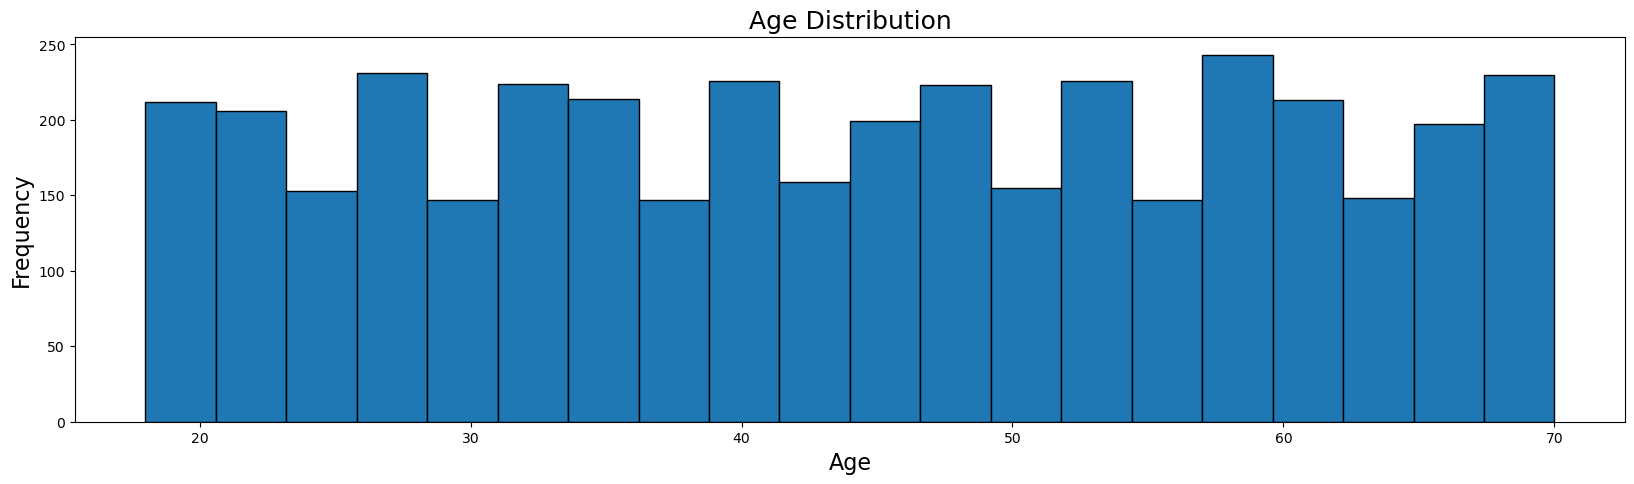

In [240]:
plt.figure(figsize=(20,5))
plt.hist(dataset.Age,bins = 20,edgecolor='black')
plt.xlabel("Age",fontsize=16)
plt.ylabel("Frequency",fontsize = 16)
plt.title("Age Distribution",fontsize = 18)

## -- We cannot clearly specify an age range in the dataset since its not a normal distribution

## Gender Distribution

Text(0.5, 0, 'Gender')

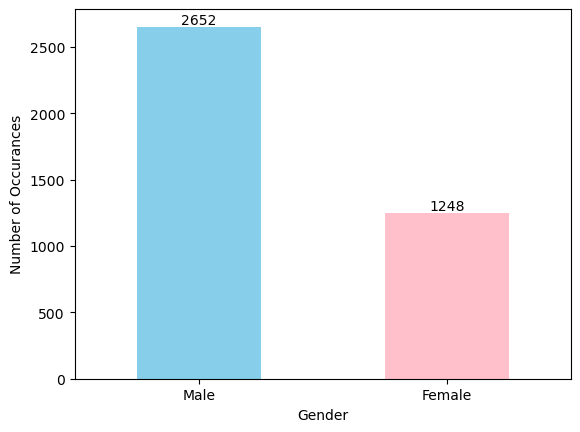

In [101]:
dataset.Gender.value_counts().plot(kind="bar",color=['skyblue','pink'])
plt.xticks(rotation="horizontal")
plt.annotate(dataset.Gender.value_counts()["Male"],xy = (0,dataset.Gender.value_counts()["Male"]),ha = 'center', va = 'bottom', color = 'black')
plt.annotate(dataset.Gender.value_counts()["Female"],xy = (1,dataset.Gender.value_counts()["Female"]),ha = 'center', va = 'bottom', color = 'black')
plt.ylabel("Number of Occurances")
plt.xlabel("Gender")

Text(0.5, 0, 'Gender')

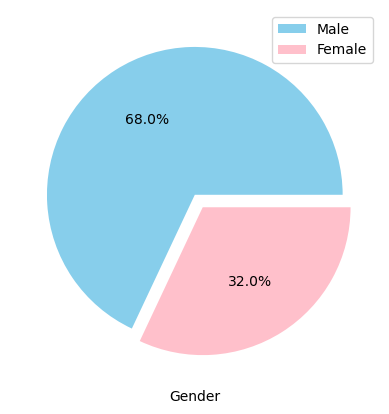

In [124]:
explode = (0,0.1)
plt.pie(dataset.Gender.value_counts(),colors=['skyblue','pink'],explode=explode,autopct='%1.1f%%')
plt.legend(dataset.Gender.value_counts().index,loc="best")
plt.xlabel("Gender")

Text(0.5, 0, 'Payment Method')

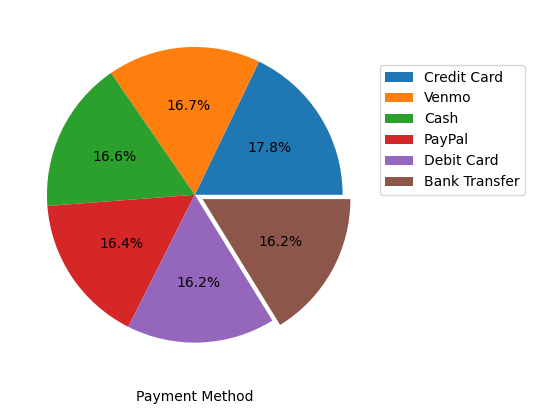

In [122]:
explode = (0, 0, 0, 0, 0.0, 0.06)
plt.pie(dataset['Payment Method'].value_counts(),explode=explode,autopct='%1.1f%%')
plt.legend(dataset['Payment Method'].value_counts().index,loc = (1,0.5))
plt.xlabel("Payment Method")

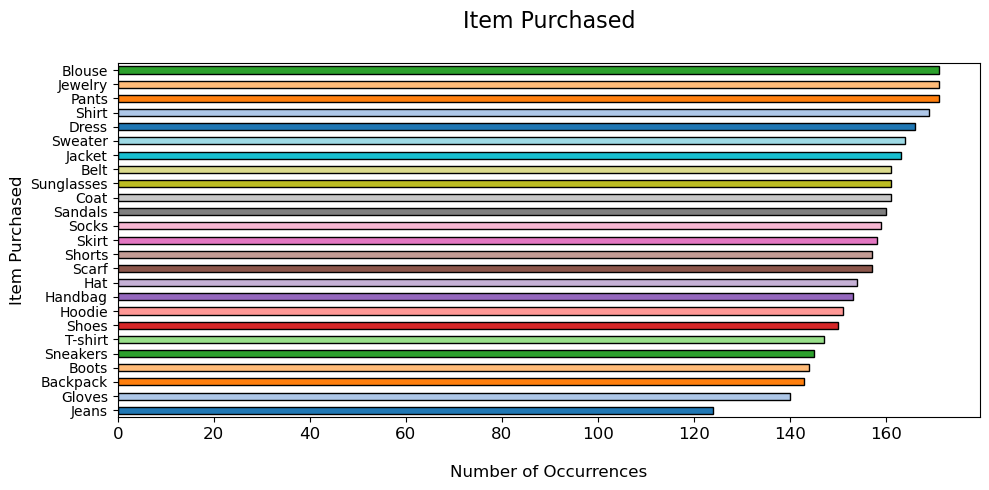

In [136]:
plt.figure(figsize=(10,5))
dataset["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 12)
plt.xlabel('\nNumber of Occurrences', fontsize = 12)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Category')

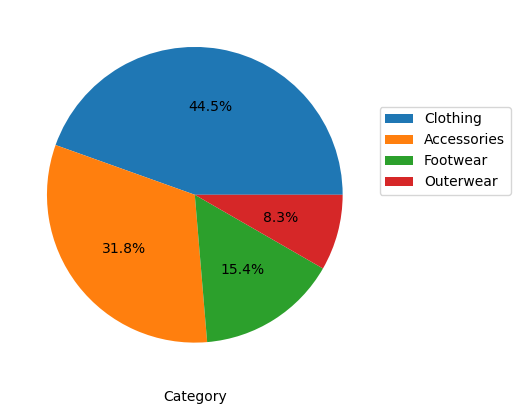

In [142]:
plt.pie(dataset.Category.value_counts(),autopct='%1.1f%%')
plt.legend(dataset['Category'].value_counts().index,loc = (1,0.5))
plt.xlabel("Category")

Text(0.5, 0, 'Subscription Status')

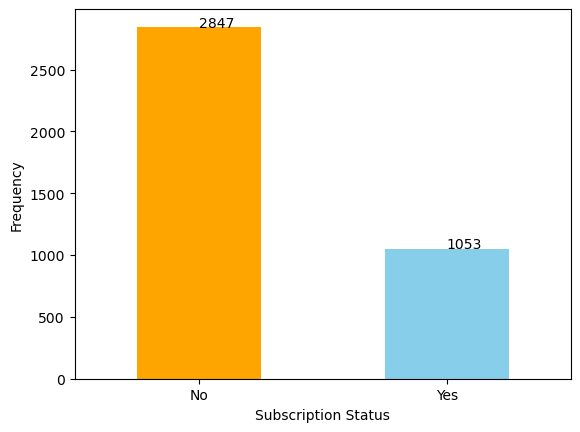

In [154]:
dataset["Subscription Status"].value_counts().plot(kind = "bar",color = ["orange","skyblue"])
plt.xticks(rotation = 'horizontal')
plt.annotate(dataset["Subscription Status"].value_counts()["No"],xy = (0,dataset["Subscription Status"].value_counts()["No"]))
plt.annotate(dataset["Subscription Status"].value_counts()["Yes"],xy = (1,dataset["Subscription Status"].value_counts()["Yes"]))
plt.ylabel("Frequency")
plt.xlabel("Subscription Status")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Every 3 Months'),
  Text(1, 0, 'Annually'),
  Text(2, 0, 'Quarterly'),
  Text(3, 0, 'Monthly'),
  Text(4, 0, 'Bi-Weekly'),
  Text(5, 0, 'Fortnightly'),
  Text(6, 0, 'Weekly')])

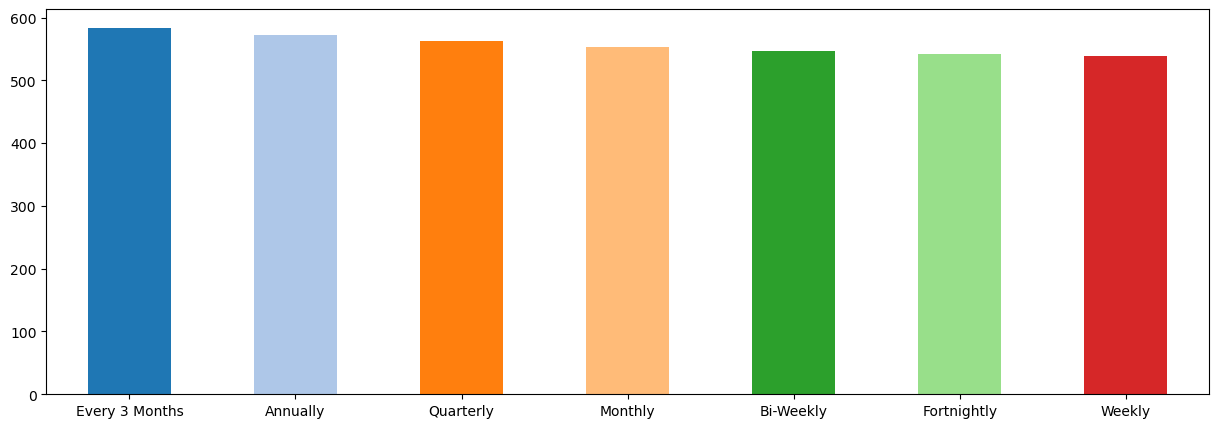

In [158]:
plt.figure(figsize=(15,5))
dataset["Frequency of Purchases"].value_counts().plot(kind = "bar",color=sns.color_palette('tab20'))
plt.xticks(rotation = "horizontal")

Text(0.5, 0, 'Discount Applied')

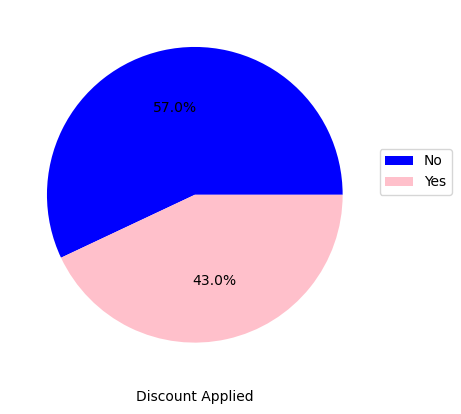

In [163]:
plt.pie(dataset["Discount Applied"].value_counts(),colors=["Blue","pink"],autopct="%1.1f%%")
plt.legend(dataset["Discount Applied"].value_counts().index,loc = (1,0.5))
plt.xlabel("Discount Applied")

## Items Purchased per Season

In [164]:
dataset.Season.value_counts()

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

In [165]:
dataset["Item Purchased"]

0         Blouse
1        Sweater
2          Jeans
3        Sandals
4         Blouse
          ...   
3895      Hoodie
3896    Backpack
3897        Belt
3898       Shoes
3899     Handbag
Name: Item Purchased, Length: 3900, dtype: object

In [166]:
season_items_df = dataset[["Season","Item Purchased"]]

In [167]:
season_items_df

,Season,Item Purchased
0,Winter,Blouse
1,Winter,Sweater
2,Spring,Jeans
3,Spring,Sandals
4,Spring,Blouse
...,...,...
3895,Summer,Hoodie
3896,Spring,Backpack
3897,Spring,Belt
3898,Summer,Shoes


In [172]:
season_item_modified_df = pd.crosstab(season_items_df["Item Purchased"],season_items_df.Season,dropna = False)

Text(0.5, 0, 'Item Purchased')

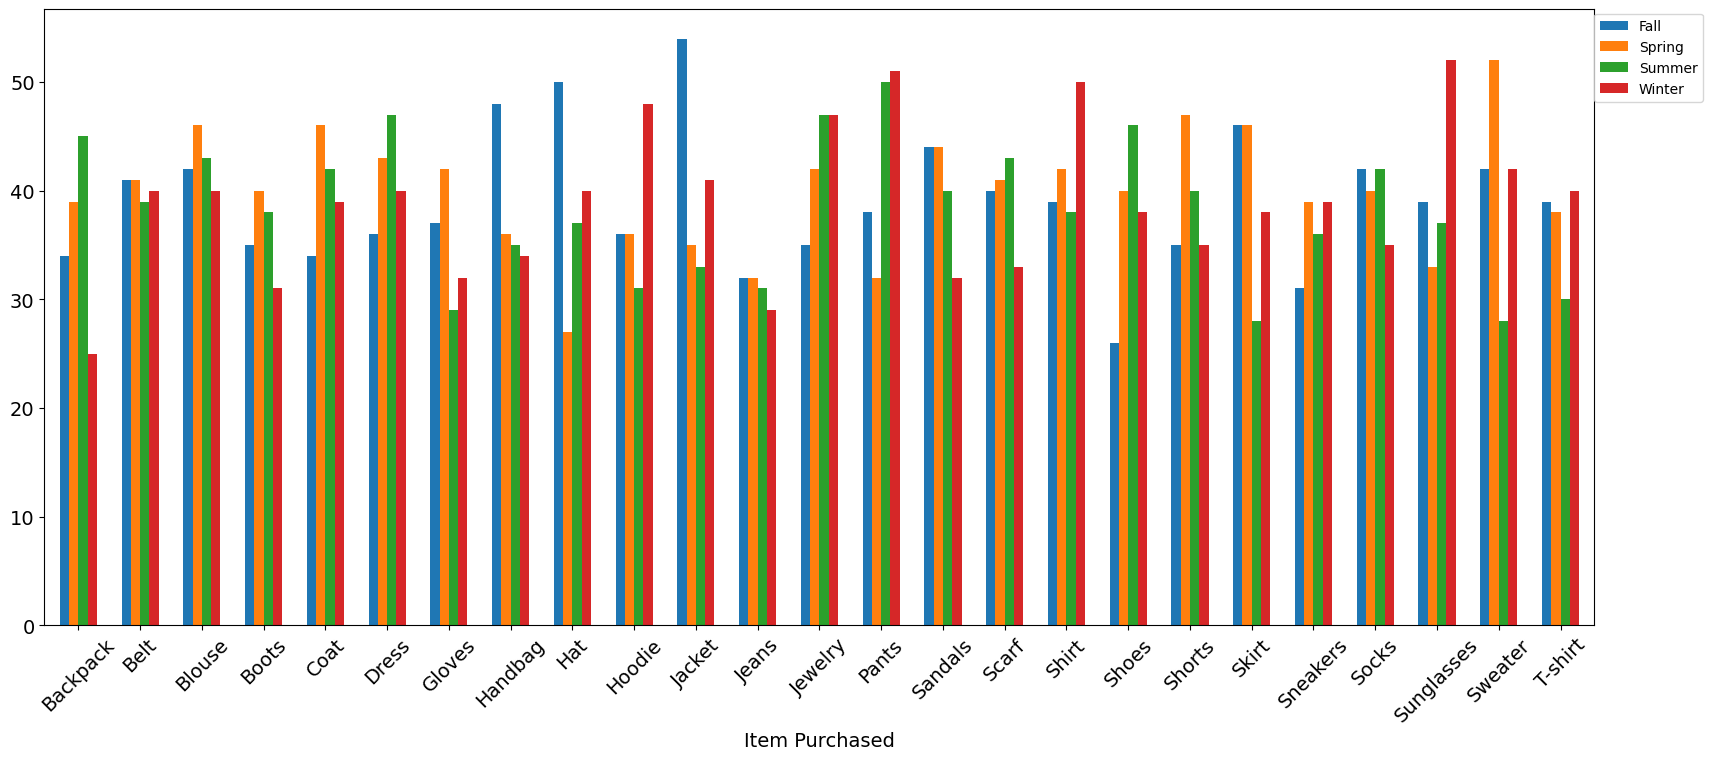

In [226]:
season_item_modified_df.plot(kind = 'bar',figsize=(20,8),fontsize = 14,width = 0.6)
plt.xticks(rotation='45')
plt.legend(loc=(1,0.85))
plt.xlabel("Item Purchased",fontsize = 14)

## Most Common Item in the dataset

In [227]:
most_common_item = dataset['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


## Average Review rating across gender

In [229]:
average_rating_male = dataset[dataset['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = dataset[dataset['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.753959276018097
Average Review Rating for Female Customers: 3.7414262820512842


## Most Common Payment Method

In [230]:
most_common_payment_method = dataset['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: Credit Card


## Number of users subscribed

In [232]:
subscription_count = dataset[dataset['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


## Most Common season with more purchases

In [233]:
most_common_season = dataset['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring
